### Grid Search CV
Grid Search is a technique for tuning hyperparameters in machine learning models. It systematically searched for the best combinations of hyperparameters by trying out every possible combination within a specific set, to find configuration that results in the best model performance

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
 

In [6]:
data = load_breast_cancer()


In [8]:
X, y = data.data, data.target
X = scale(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
params = np.arange(1, 30, 2)
param_grid = {'n_neighbors': params}

In [16]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}

In [17]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [18]:
print("Best mean cross validation score {:.3f}".format(grid.best_score_))
print("Best parameter : {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

Best mean cross validation score 0.967
Best parameter : {'n_neighbors': np.int64(9)}
test-set score: 0.979


In [19]:
results = pd.DataFrame(grid.cv_results_)
print(results.shape)

(15, 31)


In [20]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [21]:
results['split0_test_score']

0     0.930233
1     0.976744
2     0.976744
3     0.976744
4     0.976744
5     0.953488
6     0.930233
7     0.930233
8     0.930233
9     0.930233
10    0.930233
11    0.883721
12    0.883721
13    0.883721
14    0.883721
Name: split0_test_score, dtype: float64

In [23]:
from matplotlib import colors
%matplotlib inline

<Figure size 1000x200 with 0 Axes>

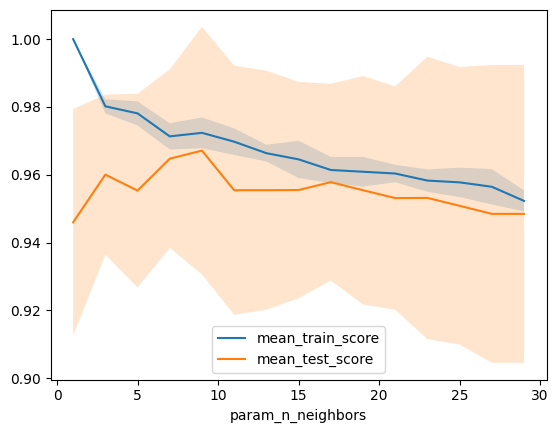

In [26]:
plt.figure(figsize=(10,2))

results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())

plt.fill_between(results.param_n_neighbors.astype(int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2
                 )

plt.fill_between(results.param_n_neighbors.astype(int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2
                 )

In [27]:
# Train the model again with the best parameters 
best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(9))

In [31]:
# Evaluate the model
test_score = best_knn.score(X_test, y_test)
print("Final test-set score with best parameter model: {:.3f}".format(test_score))

Final test-set score with best parameter model: 0.979
